In [1]:
from astroML.datasets import fetch_dr7_quasar
import numpy as np
import scipy.stats
import astropy
from matplotlib import pyplot as plt
from scipy.stats import rv_histogram
from scipy.stats import norm
from astropy.cosmology import Planck18 as cosmo
from scipy.stats import uniform

In [2]:
data = fetch_dr7_quasar()
data = data[:10000]
z = data['redshift']

(array([0.01875012, 0.07593799, 0.21187633, 0.29343926, 0.30937702,
        0.36000215, 0.37593996, 0.34500226, 0.45375297, 0.44343991,
        0.52312842, 0.57000373, 0.52219092, 0.57750313, 0.56437869,
        0.52594094, 0.51656588, 0.35531482, 0.36093946, 0.33656433,
        0.26812705, 0.22406372, 0.195939  , 0.15375083, 0.1471883 ,
        0.12281344, 0.09750053, 0.07406307, 0.06281284, 0.05906282,
        0.04218782, 0.02343763, 0.02062511, 0.03000023, 0.02625014,
        0.00843756, 0.02156267, 0.01125006, 0.0187501 , 0.00750004,
        0.00093751, 0.00468753, 0.00187502, 0.00468753, 0.00093751,
        0.00187501, 0.00375002, 0.        , 0.        , 0.00093751]),
 array([0.0802    , 0.186866  , 0.29353198, 0.40019798, 0.50686401,
        0.61352998, 0.72019601, 0.82686198, 0.93352795, 1.04019392,
        1.14686   , 1.25352597, 1.36019194, 1.46685791, 1.573524  ,
        1.68018997, 1.78685594, 1.8935219 , 2.00018787, 2.10685396,
        2.21352005, 2.3201859 , 2.42685199, 2.

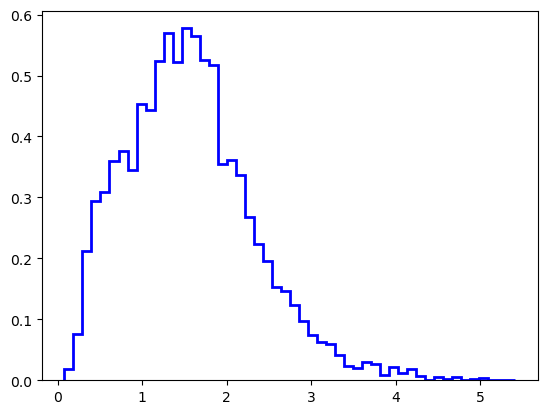

In [4]:
plt.figure(dpi = 100)
plt.hist(z, bins=50, density=True, histtype='step', color='blue', linewidth=2)

Rejection sampling: 1) upperbound 2) uniform random samples in upper bound volume 3) accept samples that are below the curve. 

In [7]:
hist, bin_edges = np.histogram(z, bins=50, density=True)
up_bound = np.max(hist)

N=10000
q = np.random.uniform(0,10,N) 
u = np.random.uniform(0,up_bound,N) 

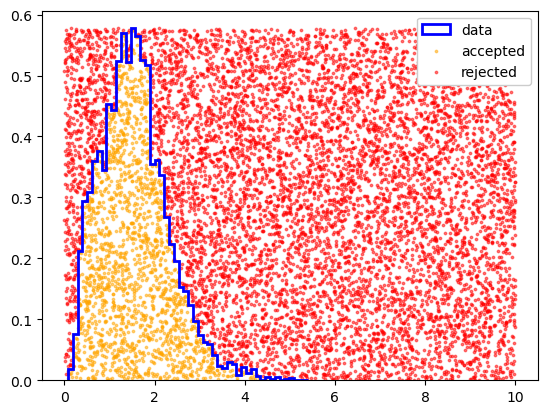

In [15]:
rv = rv_histogram((hist, bin_edges))
pdf = rv.pdf(q)

plt.hist(z, bins=50, density=True, histtype='step', color='blue', linewidth=2, label='data')
plt.scatter(q[u<pdf], u[u<pdf], c = 'orange', alpha=0.5, s=3, label='accepted') # I keep these ones
plt.scatter(q[u>pdf], u[u>pdf], c ='red', alpha=0.5, s=3, label='rejected')
plt.legend(facecolor='white', framealpha=1.0)
plt.show()

Inverse transform. 1) cdf 2) inverse cdf (quantile): generate a large number of quantiles from the CDF and then interpolate between them to find the approximate inverse for a given probability. 3)find the value of x below which a fraction u of the distribution is contained. 4)the x value you get is a random sample from the initial function

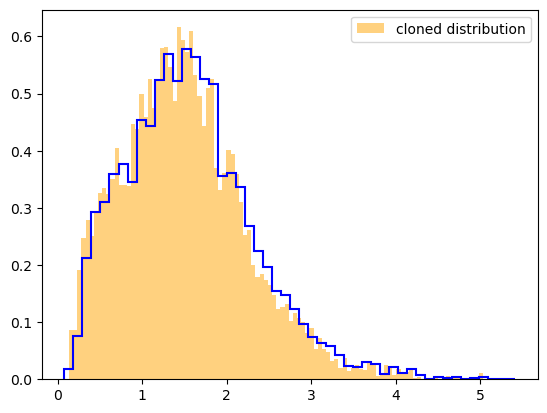

In [23]:
plt.figure(dpi = 100)
plt.hist(z, bins=50, density=True, histtype='step', color='blue', linewidth=1.5, label='data')
hist, bin_edges = np.histogram(z, bins=50, density=True)

cdf = np.cumsum(hist) #np.cumsum: This sums the counts in each bin, representing the cumulative probability.
cdf /= cdf[-1] #same as  np.cumsum(hist) / np.sum(hist) 
inverse_cdf = scipy.interpolate.interp1d(cdf, (bin_edges[1:] + bin_edges[:-1]) / 2)
u = np.random.uniform(min(cdf),max(cdf), 10000) 
x_sample = inverse_cdf(u)

plt.hist(x_sample, bins=100, density=True, histtype='bar', alpha=0.5, label='cloned distribution', color='orange');
plt.legend()

Quasar distribution

In [32]:
comoving_V = cosmo.differential_comoving_volume(z).value #the volume of the universe that is contained within a certain z
quasar_uniform = np.full_like(np.linspace(0,5,10000), fill_value=1.5e-11) #creates a new array with the same shape and data type as an array generated by the linspace, but fills it with the specified value
dist=comoving_V * quasar_uniform

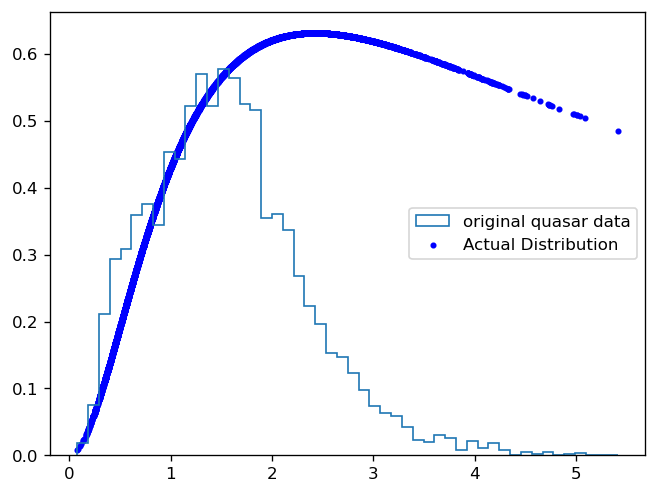

In [33]:
plt.figure(dpi = 120)
plt.hist(z,bins=50,histtype='step',density=True,label='original quasar data')
plt.scatter(z, dist, color='blue', label='Actual Distribution', s=7)
plt.legend()
plt.show()